

```
# Esto tiene formato de código
```

# Practica 3 - Modos Empíricos

**1er Cuatrimestre 2025**

**DF - FCEyN - UBA**

En este Notebook vamos a trabajar con datos experimentales correspondientes a una película del aparato fonador de un ave. En este sistema una membrana oscila debedio a la interacción con un flujo de aire (mismo fenómeno que sucede, por ejemplo, en nuestras cuerdas vocales).

Aquí la película en cuestión:
https://drive.google.com/file/d/1iakLj0IV02bDFcJklZdSBrM9Ck2Fe2nt/view?usp=sharing

Tienen que bajar los jpg en su drive

In [ ]:
from IPython.display import Image
Image(url='http://materias.df.uba.ar/sdeiaaamdda2020c2/files/2012/07/membranagif.gif')

### 1. Carpeta de Trabajo y Lectura de Archivos

Primero, vamos a montarnos sobre el directorio de google Drive. Esto nos permitira leer y guardar archivos en nuestro Drive. Generamos la dirección `root_dir` (un string) que apunta a la carpeta de trabajo. Noten que al ejecutar el comando `mount`, google nos pedirá una contraseña la cual obtendremos mediante el link que aparece.

**Nota:** Recuerden que primero deben crear en su drive la carpeta.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True) # desde aca su drive se vera en el colab como '/content/gdrive/My Drive/'

# Aca deben apuntar a la carpeta de su drive donde guardaron los datos. Es decir '/content/gdrive/My Drive/carpeta donde guardaron los datos/'
root_dir = "/content/gdrive/My Drive/Docencia/DNL-ML/Estudiantes/JPG/"
#root_dir = "/content/gdrive/My Drive/GIF/"

Mounted at /content/gdrive


Para obetner la lista de los archivos que hay en la carpeta, vamos a utilizar la librería glob.

In [ ]:
import glob
# import os
# print(os.listdir(root_dir))  # OS tambien funciona para ver qué hay dentro

lista=[]
lista=glob.glob(root_dir+'*.jpg')
lista.sort()

print(len(lista))
print(lista[0])

95
/content/gdrive/My Drive/Docencia/DNL-ML/Estudiantes/JPG/frame_000.jpg


Como verán, los archivos constan de 95 frames (imagenes) de la película. Para leer estas imágenes vamos a utilizar la función `load_img` de la librería `Keras`.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

x=[]
for file in lista:
    img = image.load_img(file, color_mode="grayscale")
    x.append(image.img_to_array(img))

x = np.array(x)

print(x.shape)

(95, 167, 120, 1)


### 2. Preprocesamiento

Primero vamos a adecuar las imágenes con las que vamos a trabajar, es decir vamos a llevarlas a una forma adecauda para poder aplicarles el algortimo de SVD.

In [ ]:
# Construyo tensor X de mxhxb con n = # de frames, h=altura, b=base.
X = x[:,:,:,0]

# Normalizamos: llevamos de [0,255] a [-0.5,0.5]
X = X.astype('float32')/255
X_medio = np.mean(X)
X = X-X_medio

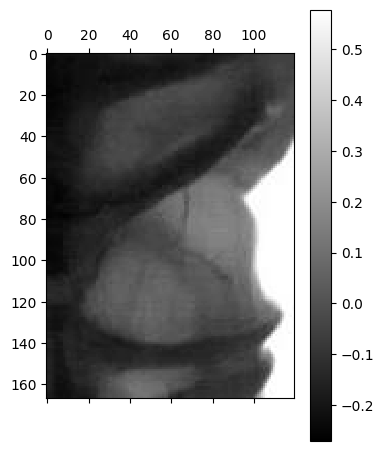

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Graficamos un frame como ejemplo
numero = 55
plt.matshow(X[numero],cmap='gray')
plt.colorbar()
plt.show()

Por ultimo, vamos "aplastar" el tensor que contiene las 95 imágenes. Es decir que vamos a llevarlo a una forma $(n,m)$ siendo $n = altura \times base$ y siendo $ m = \# \  frames$ .

In [ ]:
# Tomamos las dimensiones de X
dims = np.shape(X)

# Construyo matriz Y de nxm con n = altura x base, m = num de frames
Y = np.transpose(np.reshape(X,(dims[0],dims[1]*dims[2])))

print('Shape de la matrix original',np.shape(X))
print('Shape de la matrix aplanada',np.shape(Y))


Shape de la matrix original (95, 167, 120)
Shape de la matrix aplanada (20040, 95)


### 3. Aplicamos SVD

In [ ]:
#SVD para los primeros N frames

N = 95

# SVD Completo
Uhat, Shat, Vhat = np.linalg.svd(Y[:,:N],full_matrices=True)

# SVD Económico
#Uhat, Shat, Vhat = np.linalg.svd(Y[:,:N], full_matrices=False)


print('Shape de U:',Uhat.shape)
print('Shape de Shat:',Shat.shape)
print('Shape de Vhat:',Vhat.shape)

Shape de U: (20040, 20040)
Shape de Shat: (95,)
Shape de Vhat: (95, 95)


**Ejercicio:**
Cambie del SVD completo al SVD económico y vea como cambia la forma de las matrices. ¿Qué es lo que está cambiando entre ambos manera de computar la descomposición?

Grafiquemos la contribución de los modos de manera individual y cumulativa:

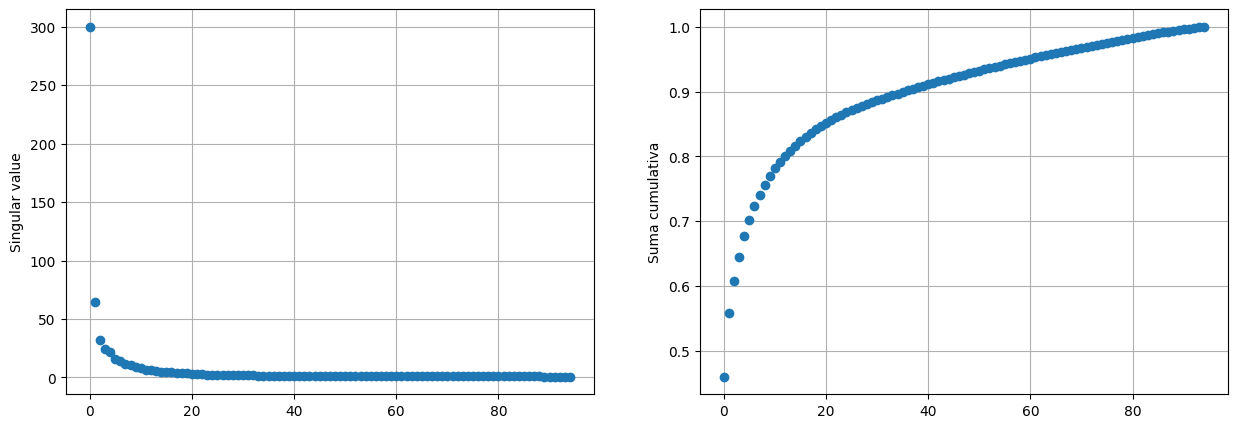

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(Shat,'o')
plt.ylabel('Singular value')
plt.grid()
plt.yscale('linear')
plt.subplot(1,2,2)
plt.plot(np.cumsum(Shat)/np.sum(Shat),'o')
plt.ylabel('Suma cumulativa')
plt.grid()


Miremos como son los primeros 6 modos.

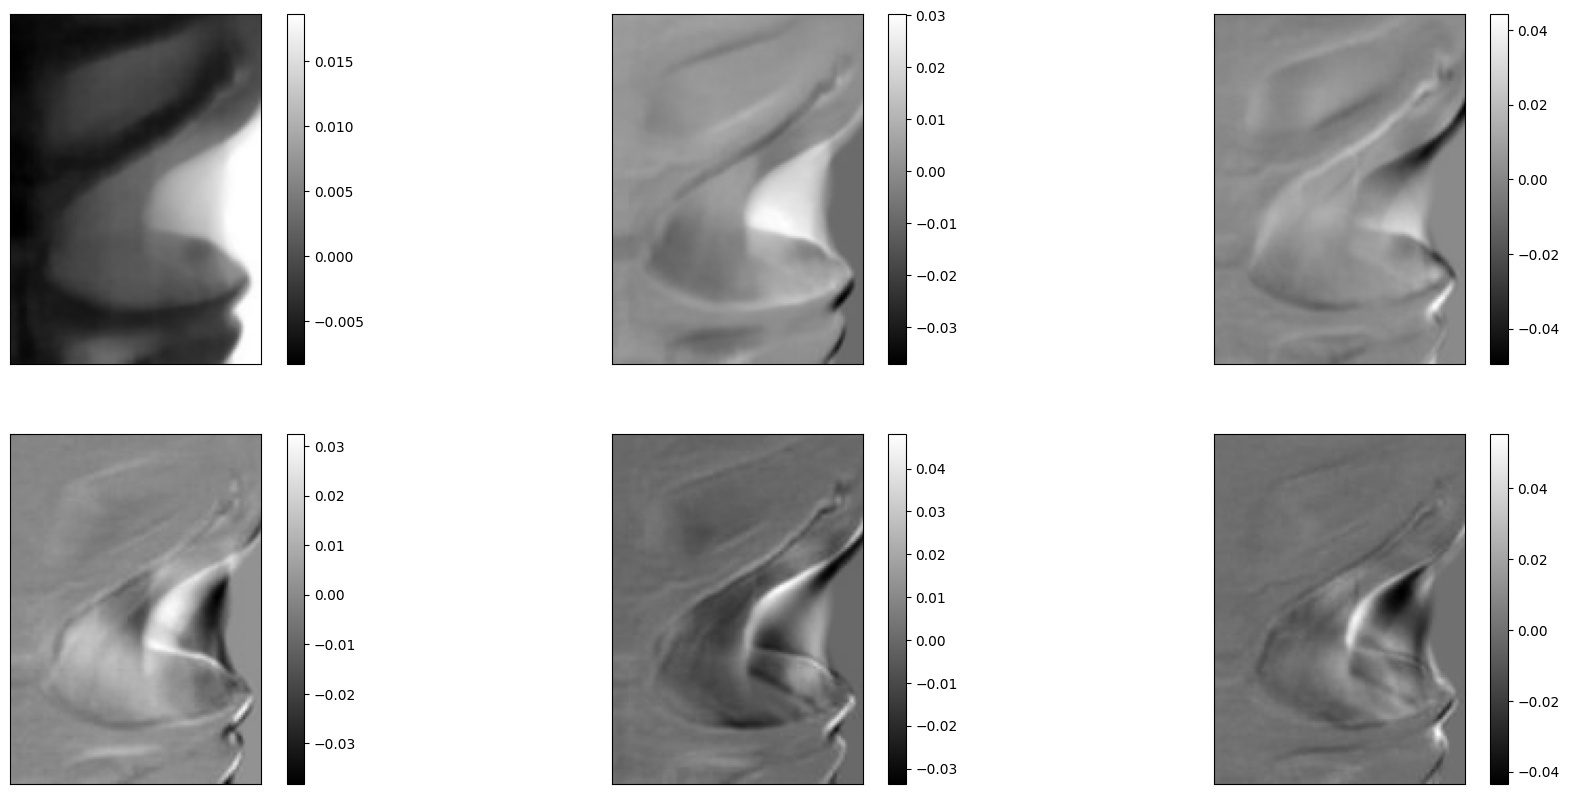

In [ ]:
plt.figure(figsize=(22,10))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(np.reshape(Uhat[:,i],(dims[1],dims[2])),cmap='gray',vmin=np.min(Uhat[:,i]),vmax=np.max(Uhat[:,i]))
  plt.xticks([])
  plt.yticks([])
  plt.colorbar()

#### 3. Evolucion Temporal de los modos

Exploremos como evolucionan temporalmente los primeros 4 modos empíricos.

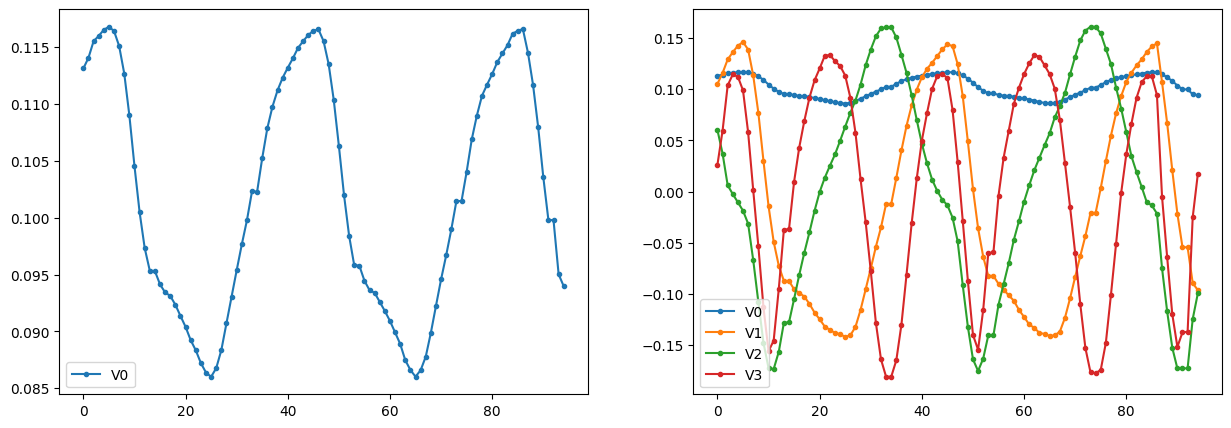

In [ ]:
#PRIMEROS MODOS TEMPORALES

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(Vhat[0],'.-',label='V0')
plt.legend()
plt.subplot(1,2,2)
plt.plot(Vhat[0],'.-',label='V0')
plt.plot(Vhat[1],'.-',label='V1')
plt.plot(Vhat[2],'.-',label='V2')
plt.plot(Vhat[3],'.-',label='V3')
plt.legend()

Si graficamos la dinámica de los primeros 3 modos, se hace evidente que el sistema se encuentra en un ciclo límite.

Text(0.5, 0, 'PC2')

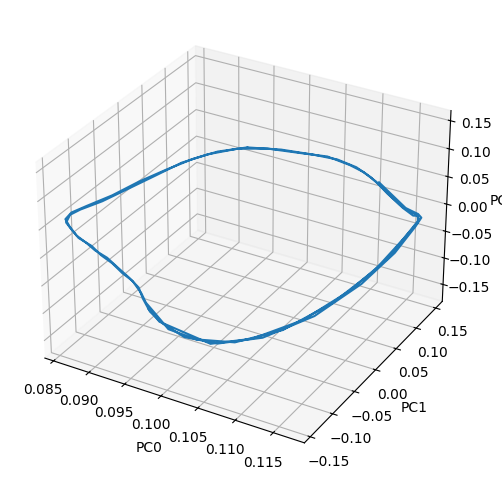

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = fig.gca(projection='3d')
ax.plot(Vhat[0],Vhat[1],Vhat[2])
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')

#### 4. Reconstrucción de la pelicula a partir de los modos truncados

Por último, vamos a reconstruir la película, pero únicamente utilizando una cantidad truncada de modos.

In [ ]:
# Numero de modos que vamos a utilizar
NUM_MODOS = 3

# Defino una lista donde acumularemos las imagenes
lista_proyeccion = []

# Recorro en el tiempo (en nuestro caso son 95 frames)
for j in range(Y.shape[1]):

    # Defino una imagen vacia donde voy a ir sumando la contribución de cada modo
    suma_modos = np.zeros_like(np.reshape(Uhat[:,0],(dims[1],dims[2])))

    # Recorro cada modo
    for i in range(NUM_MODOS):

        # Multiplicamos el modo por su contribución en ese tiempo
        mat = np.dot(Uhat[:,i],Vhat[i,j]*Shat[i])

        # Le damops la forma adecuada y los sumamos a la imagen
        mat = mat.reshape((dims[1],dims[2]))
        suma_modos = suma_modos + mat

    # Por ultimo Transformamos la matriz a valores enteros entre 0 y 255
    # (Esto es lo inveros a lo que hicimos al leer los datos)
    suma_modos = suma_modos + X_medio
    suma_modos = suma_modos * 255
    suma_modos = np.clip(suma_modos, 0, 255)
    suma_modos = suma_modos.astype('uint8')
    lista_proyeccion.append(suma_modos)

Guardamos el nuevo gif reconstruido en nuestra carpeta de trabajo:

In [ ]:
import imageio
dir_gif = root_dir+'proyeccion.gif'
imageio.mimsave(dir_gif, lista_proyeccion)

Podemos observar cómo quedó nuestra pelicula realizada unicamente con N modos.

Pelicula generada con  3 modos


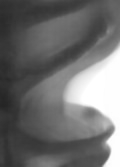

In [ ]:
from IPython.display import Image

print('Pelicula generada con ',NUM_MODOS ,'modos')
Image(open(dir_gif,'rb').read())

#### 5. La idea es que graben un video de algún fenómeno interesante para ustedes (también pueden bajarlo de internet) y le apliquen este mismo análisis.